In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_df = pd.read_csv('diamonds_data/train.csv')
test_df =  pd.read_csv('diamonds_data/test.csv')

In [3]:
# Your code here:
train_df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.04,Very Good,I,SI2,59.6,57.0,6.60,6.62,3.94,8.190
40451,40451,0.51,Very Good,E,SI1,63.3,59.0,5.09,5.05,3.21,7.246
40452,40452,1.51,Ideal,H,VS2,62.6,57.0,7.37,7.33,4.60,9.277
40453,40453,2.02,Premium,H,VS2,61.3,60.0,8.16,8.11,4.99,9.680


In [4]:
train_df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Let´s check the columns:

In [5]:
train_df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

### Let´s look at their correlation:

<AxesSubplot:>

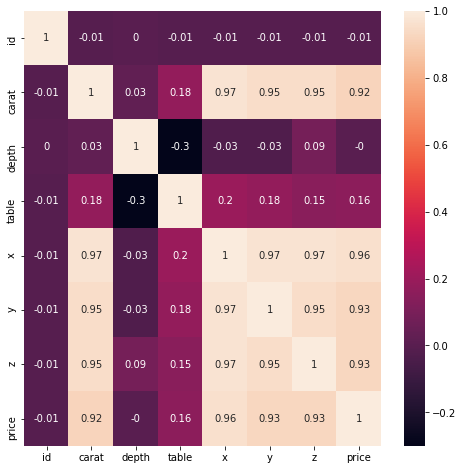

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(train_df.corr().round(2), annot = True)

### Let´s delete all the cols that have correlation with carat > 90:

In [7]:
del train_df['x']
del train_df['y']
del train_df['z']

### Let´s convert the objects into ordinal values:

In [8]:
train_df.clarity.unique()

array(['VS2', 'SI2', 'SI1', 'VVS2', 'VS1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [11]:
train_df.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [15]:
train_df.color.unique()

array(['F', 'E', 'G', 'D', 'J', 'I', 'H'], dtype=object)

In [9]:
encod = {
    "Fair":1,
    "Ideal":2,
    "Good":3,
    "Very Good":4,
    "Premium":5
}

In [10]:
train_df["cut"] = train_df["cut"].apply(lambda x: encod[x])
train_df.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,1.50,5,F,VS2,61.5,58.0,9.588
1,1,2.01,4,E,SI2,60.6,59.0,9.748
2,2,0.50,2,E,SI1,61.6,57.0,7.255
3,3,0.25,4,F,VVS2,61.6,57.0,6.450
4,4,0.52,2,G,VS2,62.0,55.0,7.721


In [11]:
train_df = pd.get_dummies(train_df, columns=[ "color", "clarity"], drop_first=True)

In [13]:
X = train_df.drop(['price','id'], axis=1)
y = train_df.price

In [67]:
train_df.head()

,id,carat,cut,depth,table,price,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.50,5,61.5,58.0,9.588,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,2.01,4,60.6,59.0,9.748,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2,0.50,2,61.6,57.0,7.255,1,0,0,0,0,0,0,1,0,0,0,0,0
3,3,0.25,4,61.6,57.0,6.450,0,1,0,0,0,0,0,0,0,0,0,0,1
4,4,0.52,2,62.0,55.0,7.721,0,0,1,0,0,0,0,0,0,0,1,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [16]:
forest = RandomForestRegressor()

In [136]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
params = {
    "n_estimators":[50,100,200,300], 
    "max_depth":[4, 5, 6, None], 
    "min_samples_split":[2,5,8], 
    "min_samples_leaf":[1,3,5,8]
}

In [137]:
clf = GridSearchCV(estimator=model, param_grid=params, verbose=2, n_jobs=4, scoring= 'neg_mean_squared_error')

In [138]:
clf.fit(X, y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [4, 5, 6, None],
                         'min_samples_leaf': [1, 3, 5, 8],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [139]:
pd.DataFrame(clf.cv_results_).sort_values(by= 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,1.522346,0.102042,0.022793,0.000655,4,3,8,50,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",-0.059680,-0.057884,-0.058369,-0.059829,-0.059759,-0.059104,0.000814,192
16,1.434276,0.009088,0.023491,0.000312,4,3,5,50,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",-0.059772,-0.057847,-0.058610,-0.059755,-0.059515,-0.059100,0.000757,191
44,1.421619,0.073801,0.024025,0.001103,4,8,8,50,"{'max_depth': 4, 'min_samples_leaf': 8, 'min_s...",-0.059682,-0.057776,-0.058601,-0.059848,-0.059533,-0.059088,0.000786,190
0,1.336007,0.029952,0.020885,0.000338,4,1,2,50,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",-0.059738,-0.057774,-0.058339,-0.059936,-0.059637,-0.059085,0.000864,189
45,2.724822,0.022226,0.040162,0.000544,4,8,8,100,"{'max_depth': 4, 'min_samples_leaf': 8, 'min_s...",-0.059635,-0.057617,-0.058390,-0.059942,-0.059615,-0.059040,0.000888,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,10.388941,0.026962,0.195625,0.010145,None,1,5,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.015310,-0.013556,-0.013715,-0.013640,-0.015161,-0.014276,0.000786,5
154,19.345692,0.015884,0.342022,0.016341,None,1,8,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.015470,-0.013402,-0.013533,-0.013603,-0.015325,-0.014267,0.000927,4
150,20.662497,0.054795,0.382711,0.024335,None,1,5,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.015373,-0.013520,-0.013672,-0.013608,-0.015147,-0.014264,0.000818,3
155,29.155055,0.068331,0.515122,0.025239,None,1,8,300,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.015371,-0.013478,-0.013601,-0.013542,-0.015311,-0.014261,0.000883,2


In [69]:
clf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [58]:
y_pred_train = best.predict(X_train)
y_pred_test = best.predict(X_test)
mse_train = mean_squared_error(y_pred_train,y_train)
mse_test = mean_squared_error(y_pred_test,y_test)
mse_train, mse_test

(0.003231829301071624, 0.0030090202286114664)

In [110]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=RandomForestRegressor(n_estimators=300), X=X, y=y, cv=10)

array([0.9847013 , 0.98632377, 0.98652563, 0.9874428 , 0.98699016,
       0.98748219, 0.98718747, 0.98681834, 0.98634139, 0.9848181 ])

In [120]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=RandomForestRegressor(n_estimators=200), X=X, y=y, cv=10)

array([0.9848284 , 0.98623563, 0.98657646, 0.98754549, 0.98698618,
       0.98747278, 0.98721218, 0.98663673, 0.98633558, 0.98471875])

###  Increasing hyperparameters:

In [19]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
params = {
    'n_estimators' : [300, 500, 600],
'max_depth' : [None],
'min_samples_split' : [5],
'min_samples_leaf' : [1]
}
 

In [20]:
adding_params = GridSearchCV(estimator=model, param_grid=params, verbose=2, n_jobs=6, scoring= 'neg_mean_squared_error')

In [21]:
adding_params.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=6,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [5],
                         'n_estimators': [300, 500, 600]},
             scoring='neg_mean_squared_error', verbose=2)

In [62]:
best1 = adding_params.best_estimator_
best1

RandomForestRegressor(min_samples_split=5, n_estimators=500)

In [23]:
adding_params.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [24]:
y_pred_train = best.predict(X_train)
y_pred_test = best.predict(X_test)
mse_train = mean_squared_error(y_pred_train,y_train)
mse_test = mean_squared_error(y_pred_test,y_test)
mse_train, mse_test

(0.004237168007806516, 0.004208411516965408)

In [26]:
model = RandomForestRegressor()
params = {
    'n_estimators' : [500, 600],
'max_depth' : [6, 8, None],
'min_samples_split' : [5, 6, 7],
'min_samples_leaf' : [1, 2, 3]
}
 

In [27]:
adding_depth = GridSearchCV(estimator=model, param_grid=params, verbose=2, n_jobs=6, scoring= 'neg_mean_squared_error')

In [28]:
adding_depth.fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=6,
             param_grid={'max_depth': [6, 8, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [5, 6, 7],
                         'n_estimators': [500, 600]},
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
best = adding_depth.best_estimator_
best

RandomForestRegressor(min_samples_split=7, n_estimators=600)

In [38]:
adding_depth.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 600}

In [39]:
y_pred_train = best.predict(X_train)
y_pred_test = best.predict(X_test)
mse_train = mean_squared_error(y_pred_train,y_train)
mse_test = mean_squared_error(y_pred_test,y_test)
mse_train, mse_test

(0.005107867383039515, 0.005093827248930206)

In [32]:
model = RandomForestRegressor()
params = {
    'n_estimators' : [600, 700, 800],
'max_depth' : [ None],
'min_samples_split' : [7, 8, 9],
'min_samples_leaf' : [1]
}
 

In [33]:
adding_split = GridSearchCV(estimator=model, param_grid=params, verbose=2, n_jobs=6, scoring= 'neg_mean_squared_error')

In [34]:
adding_split.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=6,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [600, 700, 800]},
             scoring='neg_mean_squared_error', verbose=2)

In [40]:
best = adding_split.best_estimator_
best

RandomForestRegressor(min_samples_split=9, n_estimators=700)

In [41]:
adding_split.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 700}

In [42]:
y_pred_train = best.predict(X_train)
y_pred_test = best.predict(X_test)
mse_train = mean_squared_error(y_pred_train,y_train)
mse_test = mean_squared_error(y_pred_test,y_test)
mse_train, mse_test

(0.005835017338660098, 0.005835391892677082)

In [53]:
model = RandomForestRegressor()
params = {
    'n_estimators' : [700],
'max_depth' : [ None],
'min_samples_split' : [ 9, 10, 15],
'min_samples_leaf' : [1]
}
 

In [54]:
adding_splt = GridSearchCV(estimator=model, param_grid=params, verbose=2, n_jobs=6, scoring= 'neg_mean_squared_error')

In [55]:
adding_splt.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=6,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [9, 10, 15],
                         'n_estimators': [700]},
             scoring='neg_mean_squared_error', verbose=2)

In [56]:
best = adding_splt.best_estimator_
best

RandomForestRegressor(min_samples_split=10, n_estimators=700)

In [57]:
adding_splt.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 700}

In [58]:
y_pred_train = best.predict(X_train)
y_pred_test = best.predict(X_test)
mse_train = mean_squared_error(y_pred_train,y_train)
mse_test = mean_squared_error(y_pred_test,y_test)
mse_train, mse_test

(0.006158697218028201, 0.006173011639982473)

#### Changing test.csv accordingly:

In [44]:
test_df

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.51,Very Good,E,SI2,58.3,61.9,5.19,5.20,3.04
1,1,1.02,Very Good,F,SI2,63.0,58.0,6.37,6.43,4.03
2,2,0.59,Ideal,D,VS2,61.9,56.0,5.39,5.34,3.32
3,3,0.90,Very Good,D,VS2,62.3,56.0,6.14,6.18,3.84
4,4,2.01,Premium,J,VS1,60.2,61.0,8.23,8.16,4.93
...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.05,Premium,H,SI1,61.9,58.0,6.50,6.45,4.01
13481,13481,0.32,Ideal,F,VS2,62.1,57.0,4.35,4.38,2.71
13482,13482,0.41,Premium,J,VS1,61.3,59.0,4.78,4.74,2.92
13483,13483,0.30,Premium,G,VVS2,62.2,59.0,4.31,4.28,2.67


In [45]:
del test_df['x']
del test_df['y']
del test_df['z']
del test_df['id']

### Let´s convert the objects into ordinal values:

In [46]:
test_df.clarity.unique()

array(['SI2', 'VS2', 'VS1', 'SI1', 'VVS1', 'VVS2', 'I1', 'IF'],
      dtype=object)

In [47]:
test_df.cut.unique()

array(['Very Good', 'Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

In [48]:
test_df.color.unique()

array(['E', 'F', 'D', 'J', 'G', 'I', 'H'], dtype=object)

In [49]:
encod = {
    "Fair":1,
    "Ideal":2,
    "Good":3,
    "Very Good":4,
    "Premium":5
}

In [50]:
test_df["cut"] = test_df["cut"].apply(lambda x: encod[x])
test_df.head()

,carat,cut,color,clarity,depth,table
0,0.51,4,E,SI2,58.3,61.9
1,1.02,4,F,SI2,63.0,58.0
2,0.59,2,D,VS2,61.9,56.0
3,0.90,4,D,VS2,62.3,56.0
4,2.01,5,J,VS1,60.2,61.0


In [51]:
test_dummies = pd.get_dummies(test_df, columns=[ "color", "clarity"], drop_first=True)

In [71]:
prediction_comparison = pd.DataFrame(y)

In [72]:
prediction_comparison

,price
0,9.588
1,9.748
2,7.255
3,6.450
4,7.721
...,...
40450,8.190
40451,7.246
40452,9.277
40453,9.680


In [59]:
predicted_price =  best.predict(test_dummies)

In [60]:
predicted_price

array([7.07609144, 8.3297846 , 7.68721107, ..., 6.60474194, 6.67258747,
       8.07114936])

In [63]:
predicted_price =  best1.predict(test_dummies)

In [64]:
predicted_price

array([7.08086265, 8.33237133, 7.69934369, ..., 6.6120798 , 6.64376183,
       8.06584193])

In [81]:
test_dummies.id

0            0
1            1
2            2
3            3
4            4
         ...  
13480    13480
13481    13481
13482    13482
13483    13483
13484    13484
Name: id, Length: 13485, dtype: int64

In [82]:
predicting = pd.DataFrame(test_dummies.id)

In [83]:
predicting['price']  = best.predict(test_dummies)

In [85]:
predicting.to_csv('submission_diamons.csv', index=False)

In [103]:
train_2 = pd.read_csv('diamonds_data/train.csv')
test_2 =  pd.read_csv('diamonds_data/test.csv')

In [104]:
train_2

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.04,Very Good,I,SI2,59.6,57.0,6.60,6.62,3.94,8.190
40451,40451,0.51,Very Good,E,SI1,63.3,59.0,5.09,5.05,3.21,7.246
40452,40452,1.51,Ideal,H,VS2,62.6,57.0,7.37,7.33,4.60,9.277
40453,40453,2.02,Premium,H,VS2,61.3,60.0,8.16,8.11,4.99,9.680


In [105]:
train_2 = pd.get_dummies(train_2, columns=[ "color", "clarity"], drop_first=True)

In [107]:
train_2["cut"] = train_2["cut"].apply(lambda x: encod[x])

In [108]:
train_2

,id,carat,cut,depth,table,x,y,z,price,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.50,5,61.5,58.0,7.32,7.34,4.51,9.588,0,...,0,0,0,0,0,0,0,1,0,0
1,1,2.01,4,60.6,59.0,8.11,8.25,4.96,9.748,1,...,0,0,0,0,0,1,0,0,0,0
2,2,0.50,2,61.6,57.0,5.13,5.09,3.15,7.255,1,...,0,0,0,0,1,0,0,0,0,0
3,3,0.25,4,61.6,57.0,4.05,4.08,2.50,6.450,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.52,2,62.0,55.0,5.16,5.19,3.21,7.721,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.04,4,59.6,57.0,6.60,6.62,3.94,8.190,0,...,0,1,0,0,0,1,0,0,0,0
40451,40451,0.51,4,63.3,59.0,5.09,5.05,3.21,7.246,1,...,0,0,0,0,1,0,0,0,0,0
40452,40452,1.51,2,62.6,57.0,7.37,7.33,4.60,9.277,0,...,1,0,0,0,0,0,0,1,0,0
40453,40453,2.02,5,61.3,60.0,8.16,8.11,4.99,9.680,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
X= 